Combine all PF optimisation tasks into one notebook, separated into sections by method, with small description of what each method is doing. Should be: extract data, process, both optimisations from "Covariance of Returns", VaR, MD, Simulate PF forecasts (In the "PO, VaR..." notebook)

Todo:

 - Write small description of what each method is doing
 - write comments
 label plots and coordinates on plots


# Portfolio Optimisiation, VaR, Monte Carlo Simulation + Trading Strategy
- Build a portfolio from a sample of M assets, simulate trials varying on number of assets and allocation weights, select for largest Sharpe Ratio.
- Determine VaR of built portfolio
- Generate Monte Carlo simulations of stochastic paths from portfolio
- Build basic trading strategy using path simulation

## Portfolio Optimisation

- Create 10 dummy stocks each with prices varying over 90 days, each according to previous lessons dummy data creation:
i.e. normal distribution of daily returns with unique mean $\mu$ and standard deviation $\sigma$), store in pandas dataframe called $sp$.
- Calculate daily returns for each stock ((day+1)/day)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
days = 90
port = 10

def create_stock(days):
  price_start = np.random.uniform(25,500)
  mean = np.random.uniform(0.95,1.05)
  var = np.random.uniform(0.01,0.05)
  # mean = (1/10)*np.random.standard_normal()+1
  # var = abs((1/10)*np.random.standard_normal()+0.05)
  stock_price = [price_start]
  new_price = price_start
  iter = 1
  for i in range(days-1):
      new_price = new_price * np.random.normal(mean, var)
      stock_price.append(new_price)
  return stock_price

def simulation(port,days):
  sp = pd.DataFrame()
  for iter in range(port):
    sp['stock ' + str(iter+1)] = create_stock(days)
  return sp

def generate_weights(port):
  weights  = np.random.dirichlet(np.ones(port),size=1)

  return weights

def calculate_ret_stats(sp_weighted):
  sp_final = sp_weighted.iloc[89:].sum(axis=1)
  mean = sp_weighted.mean()
  std = sp_weighted.std()

  return sp_final, mean, std

def sharpe_ratio(returns,rfr):
  mean = returns.mean().sum() - rfr
  sigma = returns.mean().std() 

  return mean/sigma



####A

- Select N arbitrary stocks, give arbitrary weight allocations (proportions) to each to make portfolio. (Total investment can be set to 1, or can be arbitrary investment total number).
- Create Pandas df. Use the allocation weights/totals and the stock price changes to get a column, for each stock, with the value of your stake in that stock for each day. (e.g. if 25% of Investment Total is invested in stock A on day 1, and stock A increases by 3% on day 2, then your value in A at day 2 would be 0.2575 in weight terms, or 0.2575 * Investment Total in total terms).
- Sum stake columns to get portfolio value. Determine mean and std of the portfolio daily returns, store trial to dictionary with respective Sharpe Ratio

####B
- Randomly sample $N$ trials of $m$ stocks, $m$ being between 3 and 6.
- Randomly allocate proportions of investment budget to selected stocks.
- Repeat above for each
- Determine best portfolio

In [ ]:
###A
trials = {}
port =10
days = 90
N=10

for iter in range(N):
  sp = simulation(port,days)
  sp_weighted = generate_weights(port)*(sp.pct_change()+1)
  final, mean, std = calculate_ret_stats(sp_weighted)
  sharpe_rat_port = sharpe_ratio(sp_weighted,0.1)*np.sqrt(90)
  trials[iter] = sharpe_rat_port
print(f'trials are: {trials}')


###B
trials = {}
port =np.random.randint(3,6)
days = 90
N=10
budget = 100000
port_weights = []


for iter in range(N):
  sp = simulation(port,days)
  weights = generate_weights(port)
  sp_weighted = budget*weights*(sp.pct_change()+1)
  final, mean, std = calculate_ret_stats(sp_weighted)
  sharpe_rat_port = sharpe_ratio(sp_weighted,0.1)*np.sqrt(90)
  trials[iter] = sharpe_rat_port
  port_weights.append(weights)


print(f'max is {max(trials, key=trials.get)}') #return trial
print(f'value is :{trials[max(trials, key=trials.get)]}') #return value
print(f'weights are: {port_weights[max(trials, key=trials.get)]}')



trials are: {0: 75.77076950588607, 1: 73.62295484557022, 2: 74.45017319301728, 3: 116.68839352384413, 4: 93.01253428408224, 5: 156.4403456123316, 6: 70.0215625518174, 7: 86.81079195763317, 8: 81.55227271541514, 9: 76.86704278776426}
max is 0
value is :304.53855222117164
weights are: [[0.33282384 0.2998923  0.36728386]]


#Value at Risk (VaR)
- Import scipy.stats as ss
- Convert daily mean and std of portfolio returns into expected quarterly returns and std  (hint: std is sqrt of variance)
- Plot Probability Density Function (pdf) and Cumulative Density Function (cdf) of expected quarterly returns (Normal distribution of mean and std).
- Use the pdf/cdf  function and plot (plus an extra step) to determine the minimum loss that a company might expect to incur with a chance of 5%. In other words, when calculated: "This portfolio has a 5% chance of losing at least X% of its value in a given quarter.

In [ ]:
import scipy.stats as stats
days_ahead = 120


sp = simulation(port,days)
sp_weighted = generate_weights(port)*(sp.pct_change()+1)
final, mean, std = calculate_ret_stats(sp_weighted)
exp_mean = mean * days_ahead
exp_std = std*np.sqrt(days_ahead)

#Monte Carlo Simulation of potfolio

In [ ]:
import numpy as np

# Portfolio parameters
mean = 0.005
std = 0.06
start_price = 1000

# Simulation parameters
num_sims = 10000
projection_days = 100

In [ ]:
# Run simulation
sims = []
for sim in range(num_sims):
    projection = [start_price]
    new_price = start_price
    daily_inc = np.random.normal(mean,std, projection_days)
    for day in range(projection_days):
        new_price *= (1+daily_inc[day])
        projection.append(new_price)
    sims.append(projection)
    
sims = np.array(sims)
sim_average = sims.mean(axis = 0)

#Trading Strategy

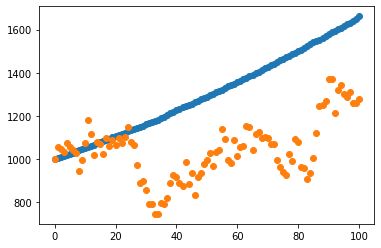

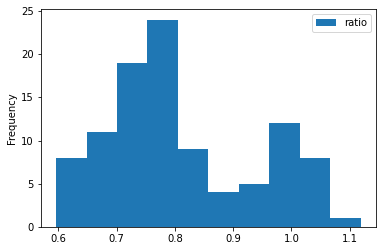

In [ ]:
# Dummy data for actual price of protfolio
actual_price = [start_price]
new_price = start_price
daily_inc = np.random.normal(mean,std, projection_days)

for day in range(projection_days):
    new_price *= (1+daily_inc[day])
    actual_price.append(new_price)

# Plot actual vs sim
plt.scatter(range(projection_days+1), sim_average)
plt.scatter(range(projection_days+1), actual_price)

#Dataframe with comparison and ratio of actual vs sim
sp = pd.DataFrame(data = np.array([sim_average, actual_price]).T, columns = ['sim','actual'])
sp['greater'] = sp['actual'] > sp['sim']
sp['ratio'] = sp['actual'] / sp['sim']
sp[['ratio']].plot(kind = 'hist')

#Covariance of Returns

In [2]:
# Packages Importing
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt

##########################################

start_date = dt.datetime(2022,1,1)
end_date = dt.datetime(2022,9,1)

tickers = ['AAPL', 'NKE', 'AMZN', 'DIS']
yf.pdr_override()
df = yf.download(tickers, start_date, end_date)

df = df.iloc[:, df.columns.get_level_values(0)=='Adj Close']
df.columns = df.columns.droplevel(0)

# returns 
rs = (df/df.shift(1))-1 
rs = rs.dropna()
df.iloc[df.shape[0]-1] / df.iloc[0] # Last day price / first day price
(rs+1).cumprod().iloc[-1] # cumulative product of all daily returns. 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  4 of 4 completed


AAPL    0.867373
AMZN    0.743936
DIS     0.714978
NKE     0.649525
Name: 2022-08-31 00:00:00, dtype: float64

## Portfolio optimisation by Covariance matrix operation
$w_a$ - weight (proportion) of investment on asset $a$ \\
$r_a$ - Daily return vector of asset $a$ \\
$\bar{r}_a$ - Mean daily return of asset $a$ \\

Portfolio return - $\Sigma_a w_a \cdot \bar{r}_a$ \\
Portfolio variance - $\Sigma_{a,b} [ w_a w_b \textbf{Cov}({r_{a},r_{b}})]$

Returns \
1 - Using labels $w_i, r_i$, draw a vector of weights for 3 stocks, w .\
2 - Draw a vector of  mean daily returns for 3 stocks, r .\
3 - Compute (wT . r) what does this represent? \
4 - Write results in sum(sigma) notation



In [5]:
weights = [0.20,0.30,0.15,0.35]

# mean daily return of each stock
rs_mean = rs.mean()

# portfolio by each individual stock with respect to its investment allocation weight. Effectively, the mean daily return of each constituent part of our portfolio
rs_mean_weighted = np.multiply(weights,rs_mean)

# the sum of the above, giving our total portfolio mean daily return
pf_ret = rs_mean_weighted.sum()
print(pf_ret)
# expected return of portfolio in 90 days
print( (pf_ret+1)**90 )

-0.0015758821123089699
0.8676722213154475


Covariance \\
1 - Using labels $w_i, r_i$, draw a vector of weights for 3 stocks, w. \
2 - Using the labels, draw a vector of daily returns for 3 stocks over T days, r.\
3 - Calculate Sigma = Covariance(r,r) (have a look at stats literature if necessary to see more about this, have a go at playing with numpy.cov(r,r)), what does this represent in terms of stocks/returns? \
4 - compute (wT . Sigma . w) what does this represent? \
5 - Write results in sum(sigma) notation

#Total portfolio variance
Now you can calulate portfolio mean and variance in another way:
- Do another monte carlo simulation: Change the vector $w$ for each trial. calculate PF Returns, PF variance, Sharpe Ratio and store.
- Plot Return vs variance plot, colour code by Sharpe ratio value. This is your efficient frontier

In [8]:
cov1 = rs.cov()
pf_var = np.dot(weights, np.dot(cov1, weights))
weights  = np.random.dirichlet(np.ones(4),size=1)[0]
rs_weighted = weights*rs.mean()

#returns
pf_ret = rs_weighted.sum()
print(pf_ret)

# pf variance
pf_variance = np.dot(weights, np.dot(cov1,weights))

def sharpe_ratio(weights, rs):
  pf_mean = (weights*rs.mean()).sum()
  cov1 = rs.cov()
  pf_variance = np.dot(weights.T, np.dot(cov1,weights))
  return [pf_mean, pf_variance, pf_mean/pf_variance]

-0.0012107726743510495


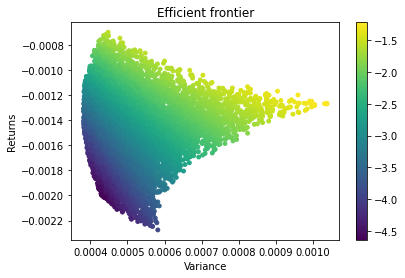

In [9]:
##Simulation
trials = 10000

results_array = []

for i in range(trials):
  weights  = np.random.dirichlet(np.ones(4),size=1)[0]
  mean, var, s_r = sharpe_ratio(weights, rs)
  results_array.append([mean,var, s_r])

res_table = pd.DataFrame(results_array, columns = ['mean', 'var', 'sr'])
res_table.sort_values('sr')

plt.scatter(res_table['var'],res_table['mean'], c= res_table['sr'], s= 15)
plt.title("Efficient frontier")
plt.xlabel("Variance")
plt.ylabel("Returns")
plt.colorbar()

In [10]:
from scipy.optimize import minimize

def negative_sharpe(weights):
  return -1 * sharpe_ratio(weights,rs)[2]

constraints = ({'type':'eq','fun': lambda w: np.sum(w)-1}) # equality constraint requiring the sum of weights to equal 1
bounds = [(0, 1) for i in range(len(weights))] # 0-1 bounds for each weight

# Initial guess
weights_0 = np.array([0.2,0.3,0.4,0.1])

# Sequential Least Squares Programming (SLSQP). This method is a least squares, non-linear optimisation method that allows constraints.
opt_results = minimize(negative_sharpe, x0=weights_0, method='SLSQP', bounds=bounds, constraints=constraints)
opt_results

     fun: 1.1753942079309487
     jac: array([-0.49807805, -1.17539422,  0.6034186 ,  0.98538058])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.00000000e+00, 1.00000000e+00, 1.44328993e-15, 2.77555756e-15])

## Manual Calculation Covariance of a Portfolio of 3 stocks
- Define 3 stocks
- Make a price trajectory for each over T days. Each price trajectory must be a sinusoid with the same frequency and phase. Assign positive amplitudes to A and B, and negative amplitude to C.
- Store in pandas. Calculate the daily returns of the stocks

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
pi = np.pi
T = 120
days = np.arange(1,T+1)

stock_A = 2*np.sin(days/(2*pi))
stock_B = 1*np.sin(days/(2*pi))
stock_C = -1*np.sin(days/(2*pi))

stocks = pd.DataFrame( {'A' : stock_A, 'B':stock_B, 'C':stock_C})
rets = stocks.pct_change().dropna()
stocks.cov()

def port_cov(df):
  df_mean = df.mean()
  diff = df - df_mean
  cov  = diff.T.dot(diff)/len(df)
  return cov

weights = np.random.dirichlet(np.ones(3),size=1)[0]
#np.dot( weights.T, np.dot(port_cov(stocks),weights)) 
stocks_arr = stocks.cov().to_numpy()
weights = weights.reshape( len(weights),1)
sum = 0

for i in range(len(weights)):
  for j in range(len(stocks_arr)):
    sum += weights.T[:,i]*weights[j,:]*stocks_arr[i,j]
    print(f'for i = {i}, sum = {sum}')

print(f'Final sum is {sum}')




for i = 0, sum = [2.44165141e-05]
for i = 0, sum = [0.00255707]
for i = 0, sum = [0.00161421]
for i = 1, sum = [0.00414686]
for i = 1, sum = [0.26685186]
for i = 1, sum = [0.16905131]
for i = 2, sum = [0.16810845]
for i = 2, sum = [0.07030791]
for i = 2, sum = [0.10671737]
Final sum is [0.10671737]
